Import packages 

In [1]:
import pandas as pd
import pandas as pd
import gensim
from gensim import corpora, models
from gensim.models.phrases import Phrases, Phraser
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Read DataSets

In [2]:
article_train=pd.read_csv("./Data Set/train.csv")
article_test=pd.read_csv("./Data Set/test.csv")
article_train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


EDA

In [3]:
article_train.shape

(20972, 9)

In [4]:
article_train.columns

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [5]:
article_train.dtypes

ID                       int64
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object

In [6]:
topic_columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
topic_counts = article_train[topic_columns].sum()
print("Topic Distribution:")
print(topic_counts)

Topic Distribution:
Computer Science        8594
Physics                 6013
Mathematics             5618
Statistics              5206
Quantitative Biology     587
Quantitative Finance     249
dtype: int64


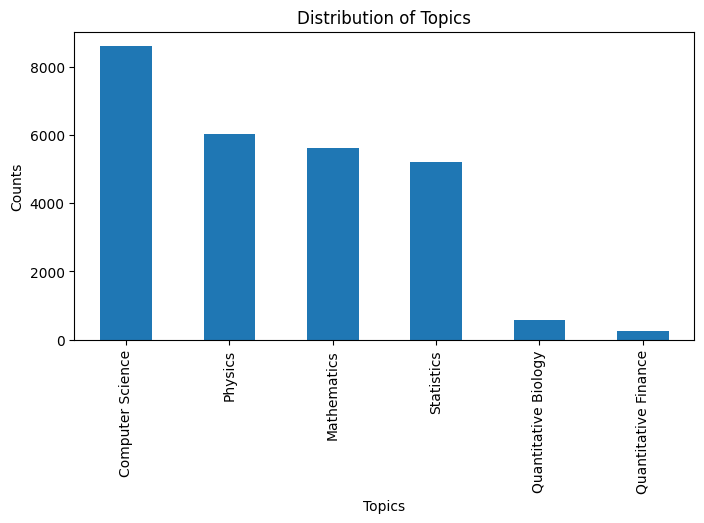

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
topic_counts.plot(xlabel='Topics', ylabel='Counts',
kind='bar')
plt.title('Distribution of Topics')
plt.show()

In [8]:
article_train['ABSTRACT']

0          Predictive models allow subject-specific inf...
1          Rotation invariance and translation invarian...
2          We introduce and develop the notion of spher...
3          The stochastic Landau--Lifshitz--Gilbert (LL...
4          Fourier-transform infra-red (FTIR) spectra o...
                               ...                        
20967      Machine learning is finding increasingly bro...
20968      Polycrystalline diamond coatings have been g...
20969      We present a new approach for identifying si...
20970      The sum of Log-normal variates is encountere...
20971      Recently, optional stopping has been a subje...
Name: ABSTRACT, Length: 20972, dtype: object

In [9]:
#merge title and abstrat for preprocessing 
article_train['Text']= article_train['TITLE'] + article_train['ABSTRACT']
article_train['Text']

0        Reconstructing Subject-Specific Effect Maps  P...
1        Rotation Invariance Neural Network  Rotation i...
2        Spherical polyharmonics and Poisson kernels fo...
3        A finite element approximation for the stochas...
4        Comparative study of Discrete Wavelet Transfor...
                               ...                        
20967    Contemporary machine learning: a guide for pra...
20968    Uniform diamond coatings on WC-Co hard alloy c...
20969    Analysing Soccer Games with Clustering and Con...
20970    On the Efficient Simulation of the Left-Tail o...
20971    Why optional stopping is a problem for Bayesia...
Name: Text, Length: 20972, dtype: object

In [10]:
#covert sentence to words 
def sent_to_words(sentences):
    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)
data_words= list(sent_to_words(article_train['Text']))


In [11]:
data_words[:2]

[['reconstructing',
  'subject',
  'specific',
  'effect',
  'maps',
  'predictive',
  'models',
  'allow',
  'subject',
  'specific',
  'inference',
  'when',
  'analyzing',
  'disease',
  'related',
  'alterations',
  'in',
  'neuroimaging',
  'data',
  'given',
  'subject',
  'data',
  'inference',
  'can',
  'be',
  'made',
  'at',
  'two',
  'levels',
  'global',
  'identifiying',
  'condition',
  'presence',
  'for',
  'the',
  'subject',
  'and',
  'local',
  'detecting',
  'condition',
  'effect',
  'on',
  'each',
  'individual',
  'measurement',
  'extracted',
  'from',
  'the',
  'subject',
  'data',
  'while',
  'global',
  'inference',
  'is',
  'widely',
  'used',
  'local',
  'inference',
  'which',
  'can',
  'be',
  'used',
  'to',
  'form',
  'subject',
  'specific',
  'effect',
  'maps',
  'is',
  'rarely',
  'used',
  'because',
  'existing',
  'models',
  'often',
  'yield',
  'noisy',
  'detections',
  'composed',
  'of',
  'dispersed',
  'isolated',
  'islands',


In [12]:
# define function for preprocessing  article text
def preprocess(text):
    custom_filters = [
        lambda x: x.lower(),          # lowercase
        lambda x: x.strip(),          # Remove whitespaces
        remove_stopwords,             # Remove stop words
    ]

    processed_texts = []
    for item in text:
        processed_text = item
        for filter_func in custom_filters:
            processed_text = filter_func(processed_text)
        processed_texts.append(processed_text)  # Append the processed tokens as a list
    
    # Generate bigrams and trigrams
    bigram = Phrases(processed_texts, min_count=5, threshold=100)
    trigram = Phrases(bigram[processed_texts], min_count=5, threshold=100)

    # Apply bigrams and trigrams to prcessed texts
    processed_texts = trigram[bigram[processed_texts]]

    return processed_texts

In [13]:
documents = [preprocess(text) for text in data_words]


In [14]:
documents[:2]

[['reconstructing',
  'subject',
  'specific',
  'effect',
  'maps',
  'predictive',
  'models',
  'allow',
  'subject',
  'specific',
  'inference',
  'analyzing',
  'disease',
  'related',
  'alterations',
  'neuroimaging',
  'data',
  'given',
  'subject',
  'data',
  'inference',
  'levels',
  'global',
  'identifiying',
  'condition',
  'presence',
  'subject',
  'local',
  'detecting',
  'condition',
  'effect',
  'individual',
  'measurement',
  'extracted',
  'subject',
  'data',
  'global',
  'inference',
  'widely',
  'local',
  'inference',
  'form',
  'subject',
  'specific',
  'effect',
  'maps',
  'rarely',
  'existing',
  'models',
  'yield',
  'noisy',
  'detections',
  'composed',
  'dispersed',
  'isolated',
  'islands',
  'article',
  'propose',
  'reconstruction',
  'method',
  'named',
  'rsm',
  'improve',
  'subject',
  'specific',
  'detections',
  'predictive',
  'modeling',
  'approaches',
  'particular',
  'binary',
  'classifiers',
  'rsm',
  'specifically',

In [15]:
from gensim.corpora import Dictionary
#create dictionary
dictionary = Dictionary(documents)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in documents]

In [16]:
bow_corpus[:2]

[[(0, 1),
  (1, 1),
  (2, 3),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 3),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 1),
  (25, 8),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 3),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 3),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 4),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 3),
  (77, 1),
  (78, 2),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 1)

LAD Topic Modeling 

In [17]:
from gensim.models import LdaModel
num_topic=6
ldamodel = LdaModel(bow_corpus, num_topics=num_topic, id2word=dictionary, passes=20, alpha='auto', eta='auto')

In [18]:
topics = ldamodel.show_topics(num_topics=num_topic, num_words=10, log=False, formatted=False)

In [19]:
for topic_id, topic in topics:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['paper', 'theory', 'space', 'equations', 'problem', 'graph', 'prove', 'functions', 'finite', 'non']
Topic: 1
Words: ['energy', 'phase', 'model', 'field', 'magnetic', 'spin', 'high', 'temperature', 'quantum', 'state']
Topic: 2
Words: ['learning', 'neural', 'network', 'deep', 'networks', 'model', 'data', 'training', 'based', 'models']
Topic: 3
Words: ['mathbb', 'mass', 'mathcal', 'groups', 'group', 'star', 'rm', 'alpha', 'galaxies', 'stars']
Topic: 4
Words: ['algorithm', 'data', 'problem', 'model', 'method', 'based', 'algorithms', 'methods', 'time', 'optimal']
Topic: 5
Words: ['data', 'based', 'network', 'time', 'paper', 'model', 'systems', 'networks', 'information', 'analysis']


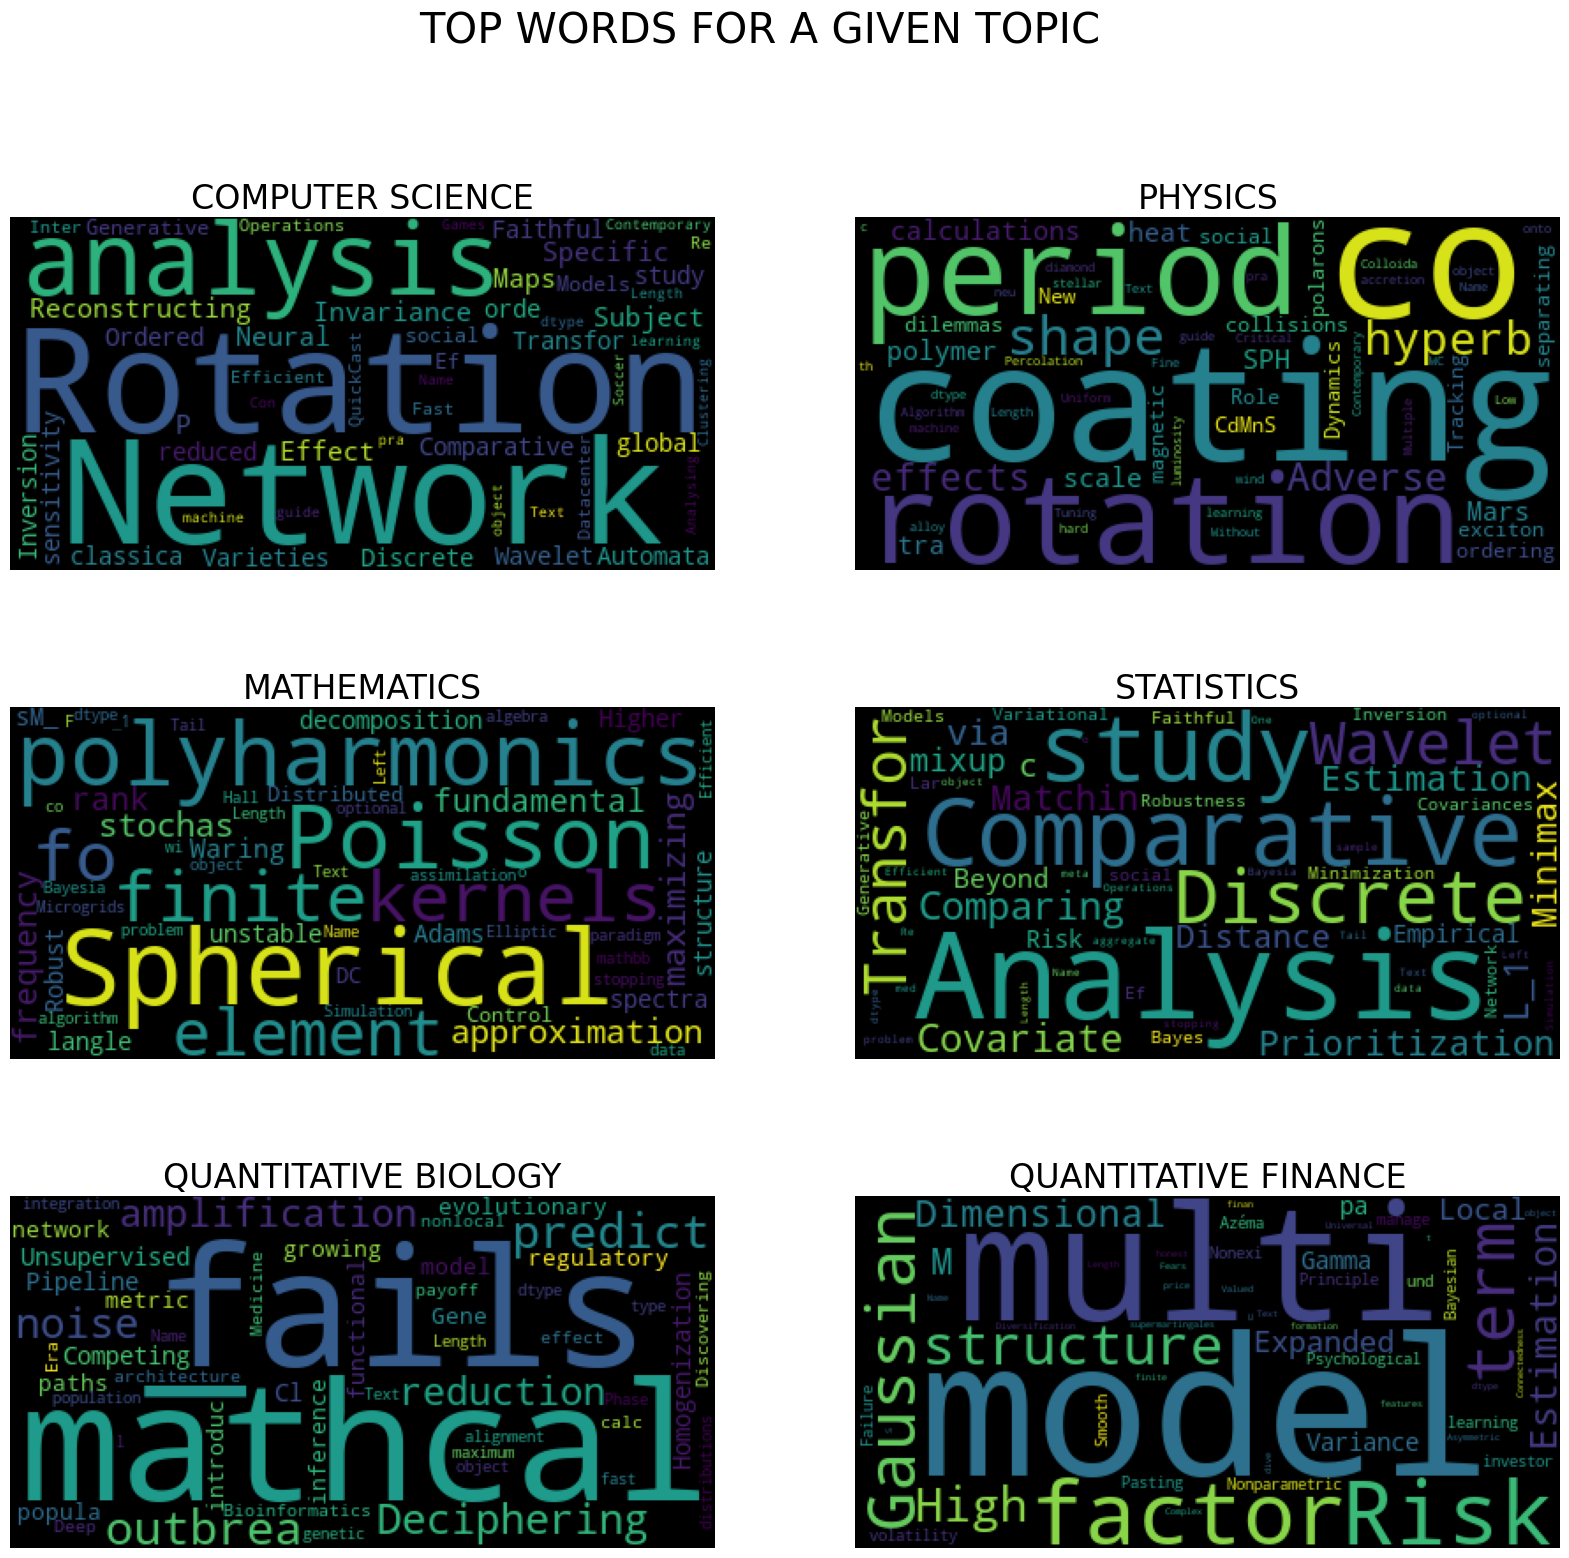

In [20]:
# Create wordcloud to of topwords for each topic
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 40)
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(topic_columns):
  sub_topic = article_train[article_train[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['Text']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

Manual Prediction 

In [21]:
new_articles = [
    {'ID': 1, 'TITLE': 'Reconstructing Subject-Specific Effect Maps', 'ABSTRACT': "Predictive models allow subject-specific inference when analyzing disease relatedalterations in neuroimaging data. Given a subject's data, inference can be made at two levels: global, i.e. identifiying condition presence for the subject, and local, i.e. detecting condition effect on each individual measurement extracted from the subject's data. While global inference is widely used, local inference, which can be used to form subject-specific effect maps, is rarely used because existing models often yield noisy detections composed of dispersed isolated islands. In this article, we propose a reconstruction method, named RSM, to improve subject-specific detections of predictive modeling approaches and in particular, binary classifiers. RSM specifically aims to reduce noise due to sampling error associated with using a finite sample of examples to train classifiers. The proposed method is a wrapper-type algorithm that can be used with different binary classifiers in a diagnostic manner, i.e. without information on condition presence. Reconstruction is posed as a Maximum-A-Posteriori problem with a prior model whose parameters are estimated from training data in a classifier-specific fashion."},
    {'ID': 2, 'TITLE': 'Computable structures on topological manifolds', 'ABSTRACT': "We propose a definition of computable manifold by introducing computability as a structure that we impose to a given topological manifold, just in the same way as differentiability or piecewise linearity are defined for smooth and PL manifolds respectively. Using the framework of computable topology and Type-2 theory of effectivity, we develop computable versions of all the basic concepts needed to define manifolds, like computable atlases and (computably) compatible computable atlases. We prove that given a computable atlas $\Phi$ defined on a set $M$, we can construct a computable topological space $(M, \tau_\Phi, \beta_\Phi, \nu_\Phi)$, where $\tau_\Phi$ is the topology on $M$ induced by $\Phi$ and that the equivalence class of this computable space characterizes the computable structure determined by $\Phi$. The concept of computable submanifold is also investigated. We show that any compact computable manifold which satisfies a computable version of the $T_2$-separation axiom, can be embedded as a computable submanifold of some euclidean space $\mathbb{R}^{q}$, with a computable embedding, where $\mathbb{R}^{q}$ is equipped with its usual topology and some canonical computable encoding of all open rational balls."},
    # ...
]

In [22]:
new_texts = [article['TITLE'] + ' ' + article['ABSTRACT'] for article in new_articles]

In [23]:
article_words= list(sent_to_words(new_texts))
new_article = [preprocess(text) for text in article_words]

In [24]:
new_corpus = [dictionary.doc2bow(doc) for doc in new_article]
new_corpus

[[(3, 1),
  (4, 1),
  (5, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (16, 2),
  (18, 1),
  (19, 3),
  (21, 1),
  (22, 3),
  (25, 4),
  (29, 1),
  (31, 2),
  (32, 1),
  (33, 1),
  (35, 1),
  (36, 1),
  (37, 3),
  (38, 1),
  (39, 1),
  (42, 1),
  (43, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (49, 1),
  (51, 1),
  (52, 2),
  (55, 1),
  (57, 1),
  (58, 4),
  (59, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (66, 1),
  (67, 2),
  (69, 1),
  (70, 1),
  (72, 2),
  (74, 1),
  (75, 1),
  (76, 2),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (82, 1),
  (83, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 2),
  (89, 1),
  (90, 1),
  (91, 1),
  (92, 1),
  (93, 1),
  (94, 1),
  (95, 2),
  (96, 1),
  (100, 2),
  (101, 1),
  (102, 1),
  (104, 5),
  (105, 1),
  (108, 7),
  (112, 1),
  (113, 1),
  (114, 1),
  (115, 1),
  (116, 1),
  (117, 1)],
 [(51, 2),
  (91, 1),
  (114, 1),
  (151, 1),
  (155, 1),
  (156, 1),
  (176, 1),
  (212, 1),
  (217, 3),
  (304, 2),
  (322, 1),
  (442, 1),
  (443, 1),


In [25]:
new_documents = ldamodel.get_document_topics(new_corpus)
new_documents

In [26]:
article_words = list(sent_to_words(new_texts))
new_articles_preprocessed = [preprocess(text) for text in article_words]
new_corpus = [dictionary.doc2bow(doc) for doc in new_articles_preprocessed]
new_documents = ldamodel.get_document_topics(new_corpus)

for i, article in enumerate(new_articles):
    # Sort the topics by score in descending order
    sorted_topics = sorted(new_documents[i], key=lambda x: x[1], reverse=True)
    
    # Get the top one or two topic names
    num_topics_to_display = min(2, len(sorted_topics))
    predicted_topic_names = [topic_columns[topic[0]] for topic in sorted_topics[:num_topics_to_display]]
    
    # Print the predicted topic names for the article
    print(f"Article ID #{article['ID']} Predicted Topics: {', '.join(predicted_topic_names)}")

Article ID #1 Predicted Topics: Quantitative Biology, Quantitative Finance
Article ID #2 Predicted Topics: Computer Science, Statistics


Predict test.csv for submission

In [ ]:
article_test.head()

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [ ]:
article_test['Text']= article_test['TITLE'] + article_test['ABSTRACT']
article_test['Text']

0       Closed-form Marginal Likelihood in Gamma-Poiss...
1       Laboratory mid-IR spectra of equilibrated and ...
2       Case For Static AMSDU Aggregation in WLANs  Fr...
3       The $Gaia$-ESO Survey: the inner disk intermed...
4       Witness-Functions versus Interpretation-Functi...
                              ...                        
8984    Supporting mixed-datatype matrix multiplicatio...
8985    An axiomatic basis for Blackwell optimality  I...
8986    GeneVis - An interactive visualization tool fo...
8987    Quantifying the causal effect of speed cameras...
8988    Cube-magic labelings of grids  We show that th...
Name: Text, Length: 8989, dtype: object

In [ ]:
# Preprocess the text in the test dataset
article_word= list(sent_to_words(article_test['Text']))
new_art = [preprocess(text) for text in article_word]

# Create an empty list to store the topic predictions
topic_predictions = []

# Iterate over the preprocessed test documents
for i, document in enumerate(new_art):
    # Convert the document to bag-of-words representation
    bow_doc = dictionary.doc2bow(document)
    
    # Get the topic distribution for the document
    topic_distribution = ldamodel.get_document_topics(bow_doc)
    
    # Get the predicted topic indices
    predicted_topics = [topic_idx for topic_idx, _ in topic_distribution if _ > 0.1]
    
    # Create a dictionary to store the topic predictions
    topic_dict = {topic_columns[topic_idx]: 1 if topic_idx in predicted_topics else 0 for topic_idx in range(len(topic_columns))}
    
    # Append the topic predictions to the list
    topic_predictions.append(topic_dict)

# Create a dataframe from the list of topic predictions
topic_predictions_df = pd.DataFrame(topic_predictions)

# Concatenate the original test dataframe with the topic predictions dataframe
test_data_with_predictions = pd.concat([article_test, topic_predictions_df], axis=1)

# Fill the NaN values with 0
test_data_with_predictions.fillna(0, inplace=True)

# Print the resulting dataframe
pd.set_option('display.max_columns', None)
print(test_data_with_predictions.to_string(index=False))


In [ ]:
#download above dataframe in csv
test_data_with_predictions.to_csv('test_data_with_prediction.csv', index=False)

In [ ]:
import joblib
joblib.dump(ldamodel, "Article_Topic_Modeling.h5")

['Article_Topic_Modeling.h5']